# Observations on Bubble Detection

In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 


In [169]:
def build_grid(img, grid_size = (100,100), line_color =(255, 0, 0) ):

    # Iterate over the rows and columns to draw the lines
    for i in range(0, img.shape[0], grid_size[0]):
        cv2.line(img, (0, i), (img.shape[1], i), line_color, 1)
    for j in range(0, img.shape[1], grid_size[1]):
        cv2.line(img, (j, 0), (j, img.shape[0]), line_color, 1)
    return img
def plot_images(img1, img2):
    img1 = build_grid(img1)
    img2 = build_grid(img2)
    f = plt.figure(figsize = (15,10))
    f.add_subplot(1,2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    f.add_subplot(1,2, 2)

    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
   
    plt.show(block=True)

def mask(img, lower_threshold = 150, upper_threshold = 250):
    
    # Create the mask for bright pixels
    mask = cv2.inRange(img, lower_threshold, upper_threshold)
    # Apply the mask to the original image to show only bright pixels
    return cv2.bitwise_and(img, img, mask=mask)

def mask_color(img, lower_bound:list, upper_bound:list):
    lower_bound = np.array(lower_bound, dtype = "uint8") 
    upper_bound = np.array(upper_bound, dtype = "uint8")
    mask = cv2.inRange(img, lower_bound, upper_bound)
    return cv2.bitwise_and(img, img, mask =  mask) 
    

In [170]:
# m1 = mask_color(cv2.imread(r'Data\1.png'), [100,100,100], [200,200,200])
# m2 = mask(mask(cv2.cvtColor(cv2.imread(r'Data\1.png'),cv2.COLOR_BGR2GRAY), 100,140))

# cv2.imshow("frame", m1-m2 )

In [171]:

img = mask_color(cv2.imread(r'Data\1.png'), [141,141,121], [150,150,220])
cv2.imshow("frame", img)
cv2.waitKey(0)
cv2.imwrite("121_200_bgr.jpeg", img)

True

In [172]:
# cam = cv2.VideoCapture("Data\plant.mp4")
# total_frames = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
# skip_rate = 20
# for i in range(0, total_frames, skip_rate):
#     cam.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cam.read()
#     # print('Position:', int(cam.get(cv2.CAP_PROP_POS_FRAMES)))
#     if frame is None or not ret:
#         break
#     # cv2.imshow("frame", cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
#     # cv2.waitKey(0)
#     mask_image = mask(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY), 100,140)
#     # print(mask_image)
#     # print(mask_image.shape)
#     # print(frame.shape)
    
#     plot_images(frame, mask_image)
    
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
# cam.release()
# cv2.destroyAllWindows()


# Observations

<li>The reflection of light on the cylinders is significant and is affecting the masked images</li>
<li>We can paint the rods to dark color so as it doesnt get detected</li>
<li>Bubbles are mostly detected in 100 to 150 range</li>

# Detecting Circles

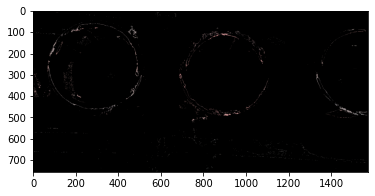

In [173]:
# img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


Performing Dilation to bold out the circles

In [174]:
kernel = np.ones((7, 7), np.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=1)

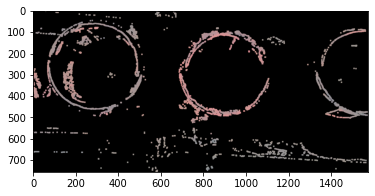

In [175]:
plt.imshow(img_dilation)

In [176]:
gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)

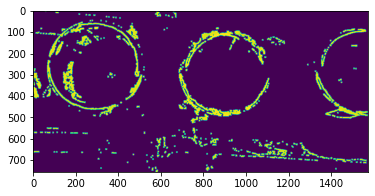

In [177]:
plt.imshow(gray)

In [178]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

In [179]:
print(circles)

[[[318.6 246.6 199.8]]]
